In [31]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score

In [32]:
# Import dataset and make a CustomerID column to index
df = pd.read_csv("d:\semester 4\Komputasi Statistika II\WA_Fn-UseC_-Telco-Customer-Churn.csv",
                        index_col = 'customerID')

df.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USER\AppData\Local\Temp\ipykernel_17708\2605240870.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("d:\semester 4\Komputasi Statistika II\WA_Fn-UseC_-Telco-Customer-Churn.csv",


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
df.shape

(7043, 20)

In [34]:
df_columns = df.columns.tolist()
for column in df_columns:
    print(f"{column} unique values : {df[column].unique()}")

gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']
StreamingMovies unique values : ['No' 'Yes' 'No internet service']
Contract unique values : ['Month-to-month' 'O

In [35]:
# Statistic descriptive
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [37]:
# Change TotalCharges to float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [38]:
df["PaymentMethod"].unique()


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [39]:
# Delete "automatic" from PaymentMethod
df["PaymentMethod"] = df["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

In [40]:
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

for feature in features_na:
    print(f"{feature}, {round(df[feature].isnull().mean(), 4)} % Missing values")

TotalCharges, 0.0016 % Missing values


In [41]:
# Check observation of missing values
df[df[features_na[0]].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card,56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


In [42]:
# Drop missing values
df.dropna(inplace=True)

In [43]:
#Apply the ggplot style
plt.style.use("ggplot")

C:\Users\USER\AppData\Local\Temp\ipykernel_17708\1571535617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df["Churn"],palette="Blues")


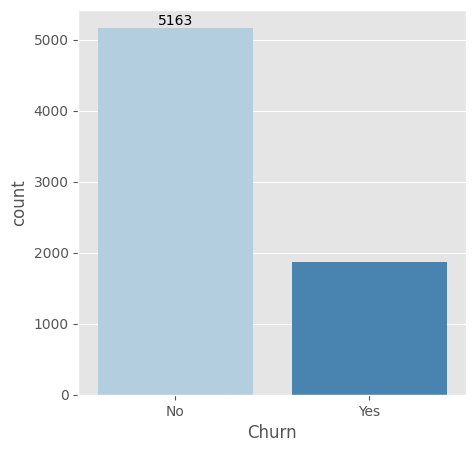

In [44]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = df["Churn"],palette="Blues")
ax.bar_label(ax.containers[0])
plt.show()

In [45]:
#Make a function to plot categorical data according to target
def plot_categorical_to_target(df,categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)
    
    fig = plt.figure(figsize = (12, 5*number_of_rows))
    
    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = df, hue = target, palette="Blues")
        ax.set_title(column)
    return plt.show()

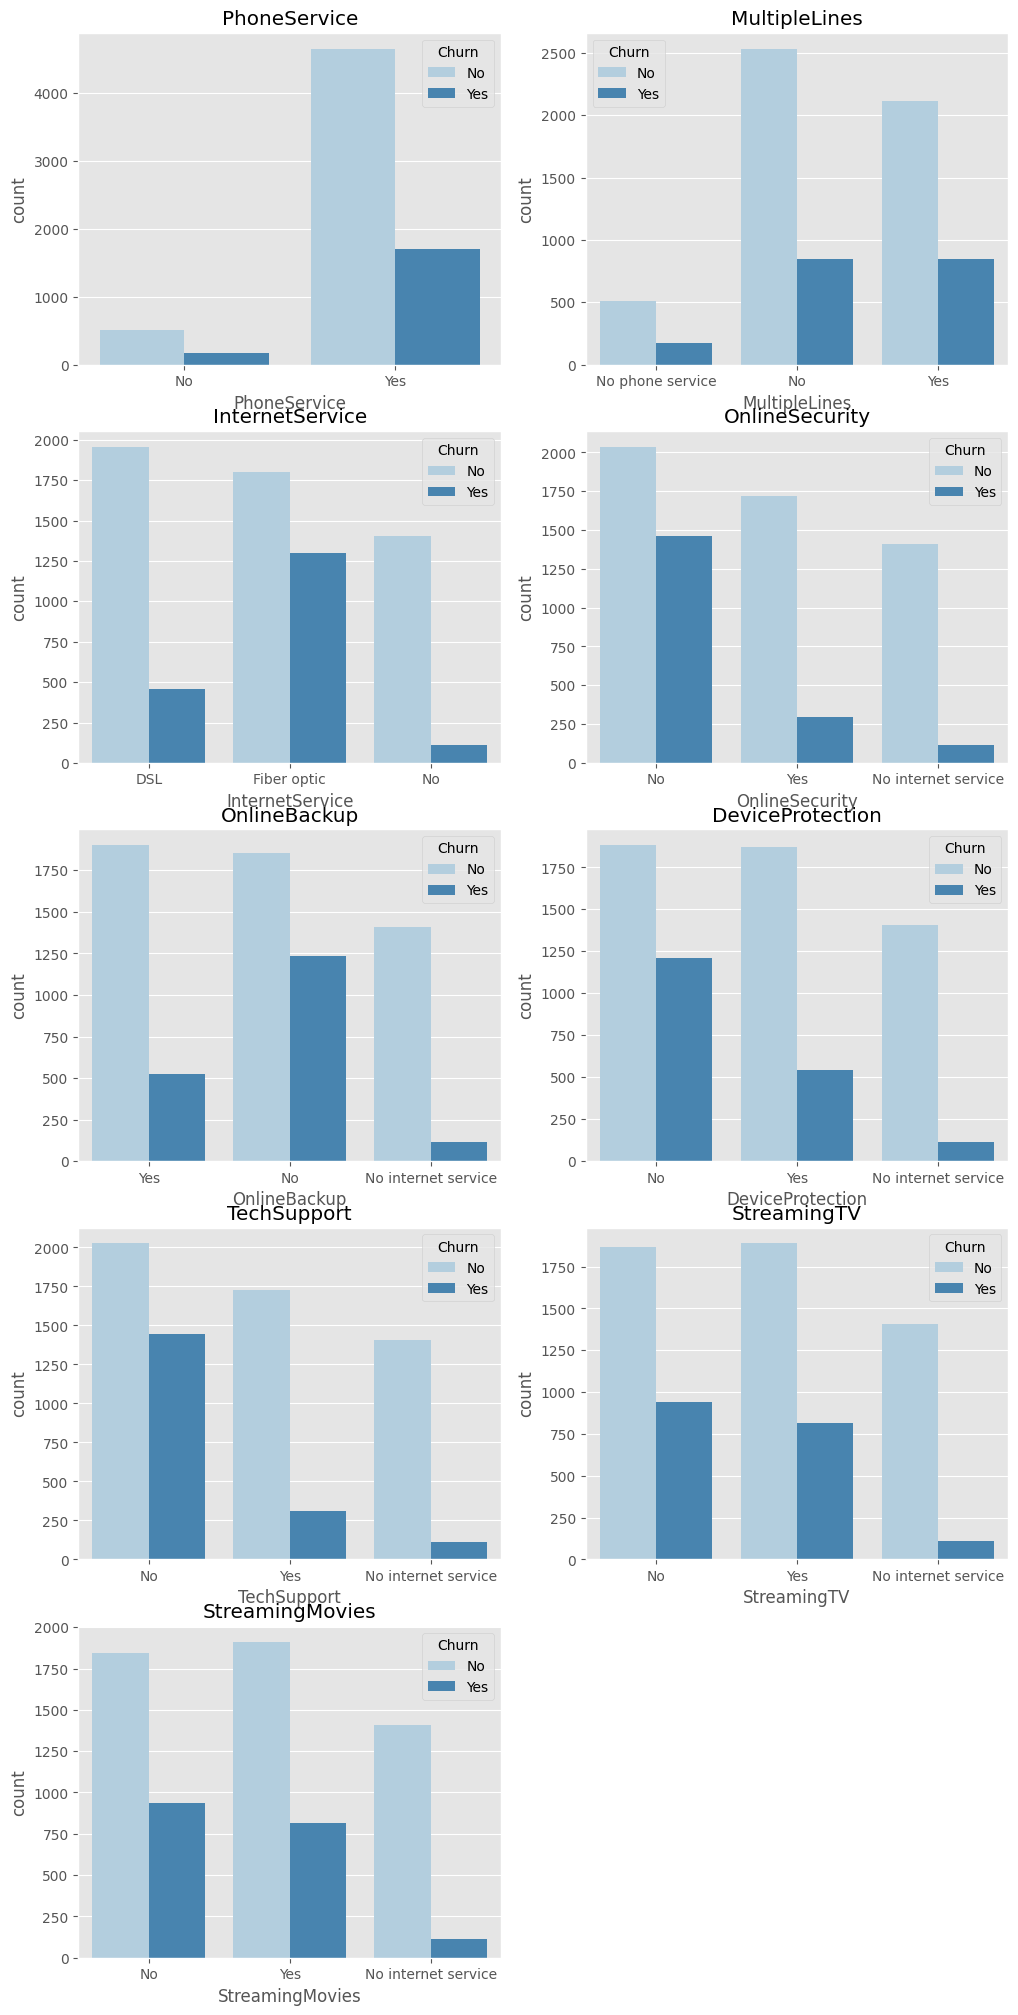

In [46]:
customer_services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_categorical_to_target(df,customer_services, "Churn")

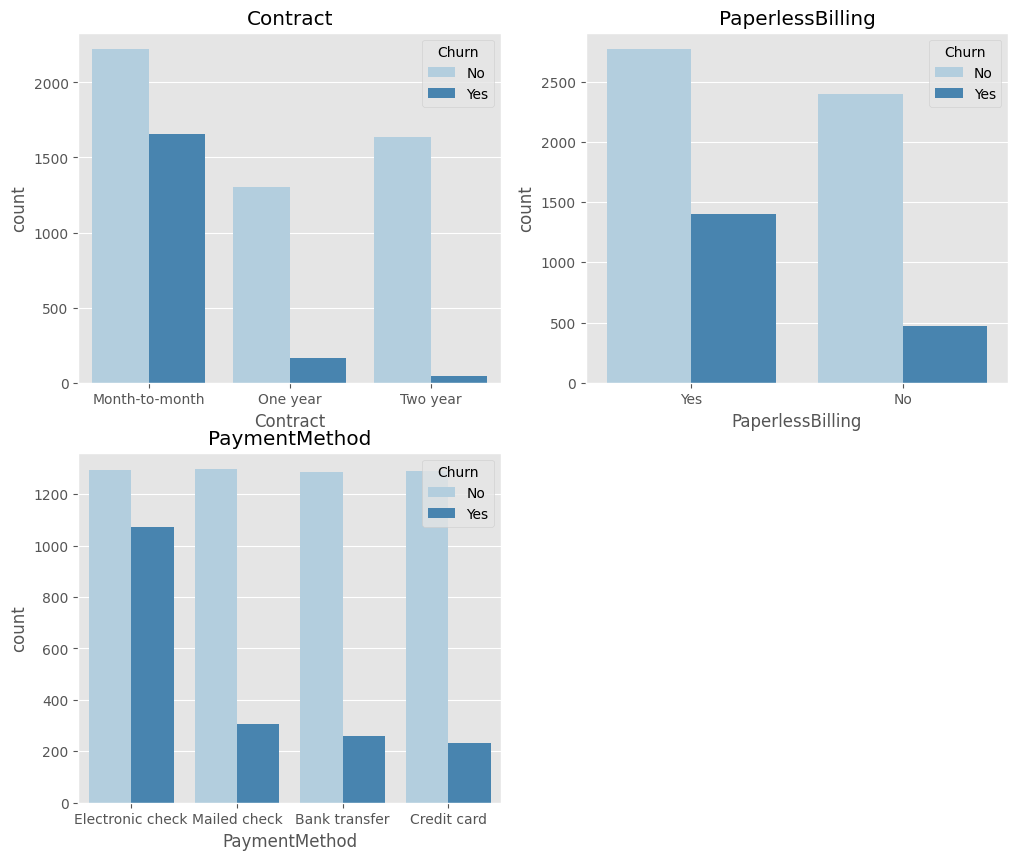

In [47]:
customer_account_cat = ["Contract","PaperlessBilling","PaymentMethod"]
plot_categorical_to_target(df,customer_account_cat,"Churn")

In [48]:
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    
    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(df[column][df[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(df[column][df[target]=="No"], fill = True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')
    plt.savefig("numerical_variables.png", dpi=300)
    return plt.show()

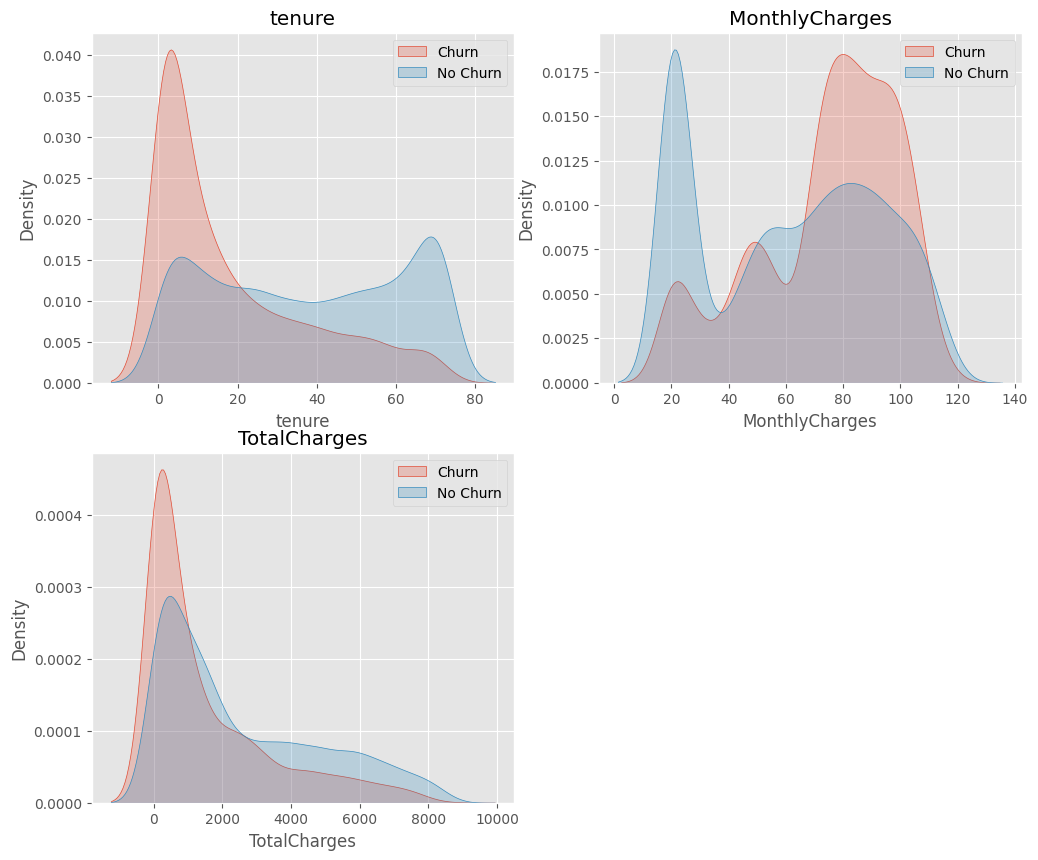

In [49]:
customer_account_num = ["tenure", "MonthlyCharges","TotalCharges"]
histogram_plots(df,customer_account_num, "Churn")

In [50]:
def outlier_check_boxplot(df,numerical_values):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = df, palette = "Blues")
        ax.set_title(column)
    plt.savefig("Outliers_check.png", dpi=300)
    return plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17708\4231409617.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = column, data = df, palette = "Blues")
C:\Users\USER\AppData\Local\Temp\ipykernel_17708\4231409617.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = column, data = df, palette = "Blues")
C:\Users\USER\AppData\Local\Temp\ipykernel_17708\4231409617.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = column, data = df, palette = "Blues")


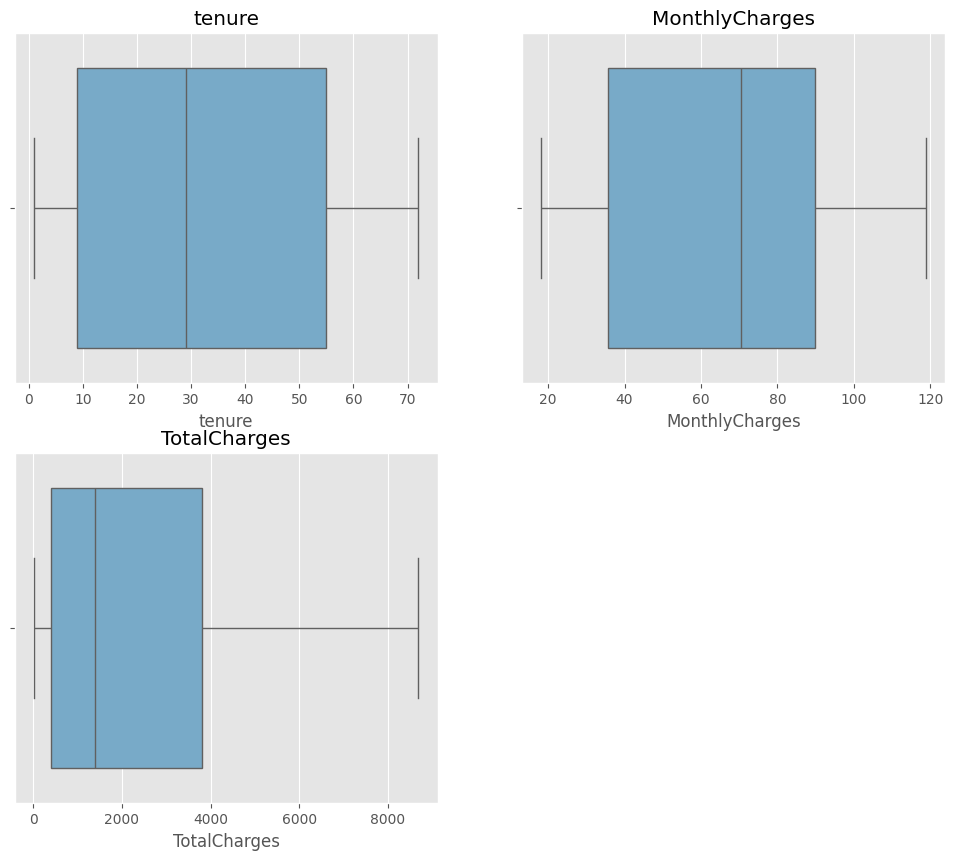

In [51]:
numerical_values = ["tenure","MonthlyCharges","TotalCharges"]
outlier_check_boxplot(df,numerical_values)

In [52]:
feature_le = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

df = label_encoding(df,feature_le)
df["gender"] = df["gender"].map({"Female":1, "Male":0})

In [53]:
features_ohe = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df, columns=features_ohe)
df_ohe = df_ohe.astype(int)
df_ohe


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,1,29,29,0,...,1,0,0,1,0,0,0,0,1,0
5575-GNVDE,0,0,0,0,34,1,0,56,1889,0,...,1,0,0,0,1,0,0,0,0,1
3668-QPYBK,0,0,0,0,2,1,1,53,108,1,...,1,0,0,1,0,0,0,0,0,1
7795-CFOCW,0,0,0,0,45,0,0,42,1840,0,...,1,0,0,0,1,0,1,0,0,0
9237-HQITU,1,0,0,0,2,1,1,70,151,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,0,1,1,24,1,1,84,1990,0,...,0,0,1,0,1,0,0,0,0,1
2234-XADUH,1,0,1,1,72,1,1,103,7362,0,...,0,0,1,0,1,0,0,1,0,0
4801-JZAZL,1,0,1,1,11,0,1,29,346,0,...,1,0,0,1,0,0,0,0,1,0


In [54]:
features_mms = ["tenure","MonthlyCharges","TotalCharges"]

df_mms = pd.DataFrame(df_ohe, columns=features_mms)
df_remaining = df_ohe.drop(columns=features_mms)

mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

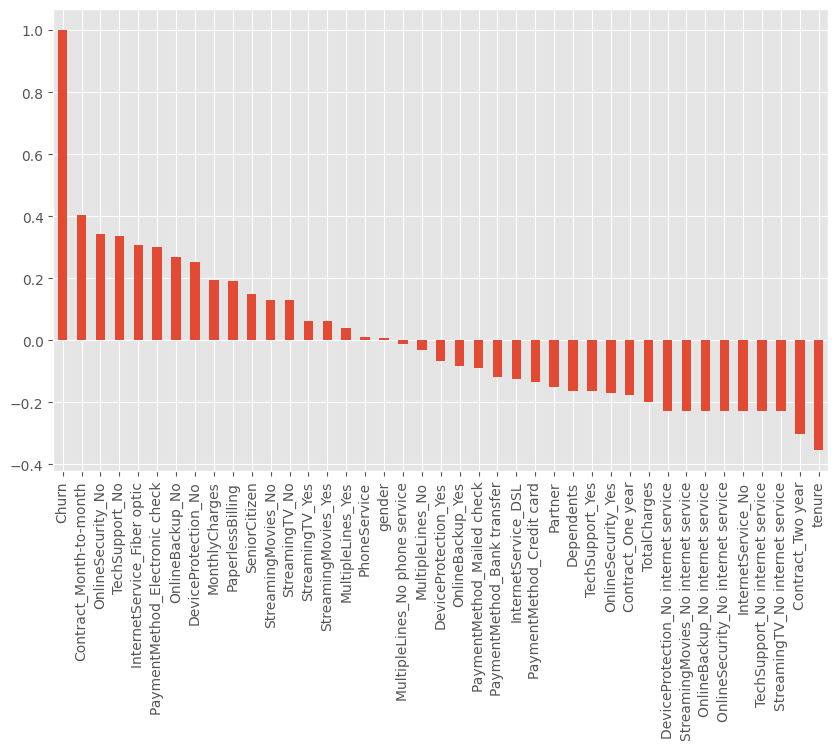

In [55]:
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.savefig("correlation.png", dpi=300)
plt.show()

In [56]:
# ===== 1. Data Preparation =====
X = df.drop(columns = "Churn")
y = df.Churn


X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 40), (1407, 40), (5625,), (1407,))

In [57]:
import sys
!{sys.executable} -m pip install torch torchvision torchaudio



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
#Import package PyTorch for Neural Network
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [78]:
# NN Model Parameter
EPOCHS = 200
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [61]:
from torch.utils.data import Dataset

class TrainData(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]


In [62]:
# Buat dataset
train_data = TrainData(torch.FloatTensor(X_train.values), torch.FloatTensor(y_train.values))
test_data = TrainData(torch.FloatTensor(X_test.values), torch.FloatTensor(y_test.values))

# Buat DataLoader
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE)


In [63]:
# Model with BatchNorm + Dropout
class BatchNormDropoutNN(nn.Module):
    def __init__(self, input_dim):
        super(BatchNormDropoutNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)


In [64]:
# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BatchNormDropoutNN(X_train.shape[1]).to(device)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


In [65]:
# Accuracy function
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct = (y_pred_tag == y_test).sum().float()
    return (correct / y_test.shape[0]) * 100

In [68]:
# Early stopping parameters
patience = 5
best_loss = float('inf')
epochs_no_improve = 0

for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    epoch_acc = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device).unsqueeze(1)

        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        acc = binary_acc(y_pred, y_batch)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    avg_loss = epoch_loss / len(train_loader)
    avg_acc = epoch_acc / len(train_loader)

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {avg_loss:.4f}, Acc: {avg_acc:.2f}%")

    # --- EARLY STOPPING ---
    model.eval()
    with torch.no_grad():
        val_loss = 0
        for X_val_batch, y_val_batch in test_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device).unsqueeze(1)
            val_pred = model(X_val_batch)
            val_loss += loss_fn(val_pred, y_val_batch).item()
        val_loss /= len(test_loader)

    if val_loss < best_loss:
        best_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"\nEarly stopping triggered at epoch {epoch+1}")
            model.load_state_dict(best_model_state)  # Restore best model
            break


Epoch 1/200, Loss: 0.4074, Acc: 80.87%
Epoch 2/200, Loss: 0.4105, Acc: 80.68%
Epoch 3/200, Loss: 0.4069, Acc: 80.48%
Epoch 4/200, Loss: 0.4028, Acc: 81.01%
Epoch 5/200, Loss: 0.4055, Acc: 80.50%
Epoch 6/200, Loss: 0.3992, Acc: 81.24%
Epoch 7/200, Loss: 0.4000, Acc: 80.82%
Epoch 8/200, Loss: 0.4028, Acc: 81.30%
Epoch 9/200, Loss: 0.3956, Acc: 81.04%
Epoch 10/200, Loss: 0.3985, Acc: 81.12%

Early stopping triggered at epoch 10


In [69]:
# ===== 2. Dataset Class =====
class TrainData(Dataset):
    def __init__(self,X_data,y_data):
        self.X_data = X_data
        self.y_data = y_data
    
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    
    def __len__(self):
        return len(self.X_data)
    
class TestData(Dataset):
    def __init__(self,X_data):
        self.X_data = X_data
    
    def __getitem__(self,index):
        return self.X_data[index]
    
    def __len__(self):
        return len(self.X_data)

In [70]:
# ===== 3. Convert to Tensor =====
X_train_tensor = torch.FloatTensor(X_train.to_numpy())
y_train_tensor = torch.FloatTensor(y_train.to_numpy())
X_test_tensor = torch.FloatTensor(X_test.to_numpy())
y_test_tensor = torch.FloatTensor(y_test.to_numpy())

train_data = TrainData(X_train_tensor, y_train_tensor)
test_data = TrainData(X_test_tensor, y_test_tensor)  # pakai TrainData biar ada y_test

train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=64)

In [71]:
# ===== 4. Neural Network =====
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        self.layer_1 = nn.Linear(X_train.shape[1],64)
        self.layer_2 = nn.Linear(40,64)
        self.layer_out = nn.Linear(64,1)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(inputs))
        x = self.dropout(x)
        x = self.layer_out(x)
        return x

In [72]:
# ===== 5. Training Setup =====
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [73]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum / y_test.shape[0]
    return torch.round(acc * 100)

In [75]:
model = BinaryClassification()
model.to(device)

print(model)
#Define loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr = LEARNING_RATE)

BinaryClassification(
  (layer_1): Linear(in_features=40, out_features=64, bias=True)
  (layer_2): Linear(in_features=40, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


In [76]:
# Create a function for calculate accuracy
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc*100)
    return acc

In [89]:
# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BinaryClassification().to(device)

# Loss dan Optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Early Stopping Parameters
patience = 5
best_val_loss = float('inf')
epochs_no_improve = 0
best_model_state = None

# Inisialisasi list untuk menyimpan loss & akurasi tiap epoch
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training Loop
for epoch in range(EPOCHS):
    model.train()
    train_loss = 0
    train_acc = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += acc.item()

    avg_train_loss = train_loss / len(train_loader)
    avg_train_acc = train_acc / len(train_loader)

    # Validation
    model.eval()
    val_loss = 0
    val_acc = 0

    with torch.no_grad():
        for X_val, y_val in test_loader:
            X_val, y_val = X_val.to(device), y_val.to(device)
            y_val_pred = model(X_val)
            val_loss += loss_fn(y_val_pred, y_val.unsqueeze(1)).item()
            val_acc += binary_acc(y_val_pred, y_val.unsqueeze(1)).item()

    avg_val_loss = val_loss / len(test_loader)
    avg_val_acc = val_acc / len(test_loader)

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(avg_train_acc)
    val_accuracies.append(avg_val_acc)

    print(f"Epoch {epoch+1:02d}/{EPOCHS} | "
          f"Train Loss: {avg_train_loss:.4f} | Train Acc: {avg_train_acc:.2f}% || "
          f"Val Loss: {avg_val_loss:.4f} | Val Acc: {avg_val_acc:.2f}%")

    # Early Stopping Check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"\nEarly stopping triggered at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break


Epoch 01/200 | Train Loss: 0.5166 | Train Acc: 74.66% || Val Loss: 0.4559 | Val Acc: 77.82%
Epoch 02/200 | Train Loss: 0.4318 | Train Acc: 79.42% || Val Loss: 0.4425 | Val Acc: 78.95%
Epoch 03/200 | Train Loss: 0.4241 | Train Acc: 79.85% || Val Loss: 0.4393 | Val Acc: 79.50%
Epoch 04/200 | Train Loss: 0.4211 | Train Acc: 79.91% || Val Loss: 0.4386 | Val Acc: 79.23%
Epoch 05/200 | Train Loss: 0.4194 | Train Acc: 79.70% || Val Loss: 0.4389 | Val Acc: 79.14%
Epoch 06/200 | Train Loss: 0.4191 | Train Acc: 79.91% || Val Loss: 0.4339 | Val Acc: 79.77%
Epoch 07/200 | Train Loss: 0.4183 | Train Acc: 80.15% || Val Loss: 0.4319 | Val Acc: 79.77%
Epoch 08/200 | Train Loss: 0.4157 | Train Acc: 80.03% || Val Loss: 0.4308 | Val Acc: 79.91%
Epoch 09/200 | Train Loss: 0.4152 | Train Acc: 80.31% || Val Loss: 0.4305 | Val Acc: 79.91%
Epoch 10/200 | Train Loss: 0.4142 | Train Acc: 80.06% || Val Loss: 0.4323 | Val Acc: 79.77%
Epoch 11/200 | Train Loss: 0.4134 | Train Acc: 80.48% || Val Loss: 0.4283 | Val 

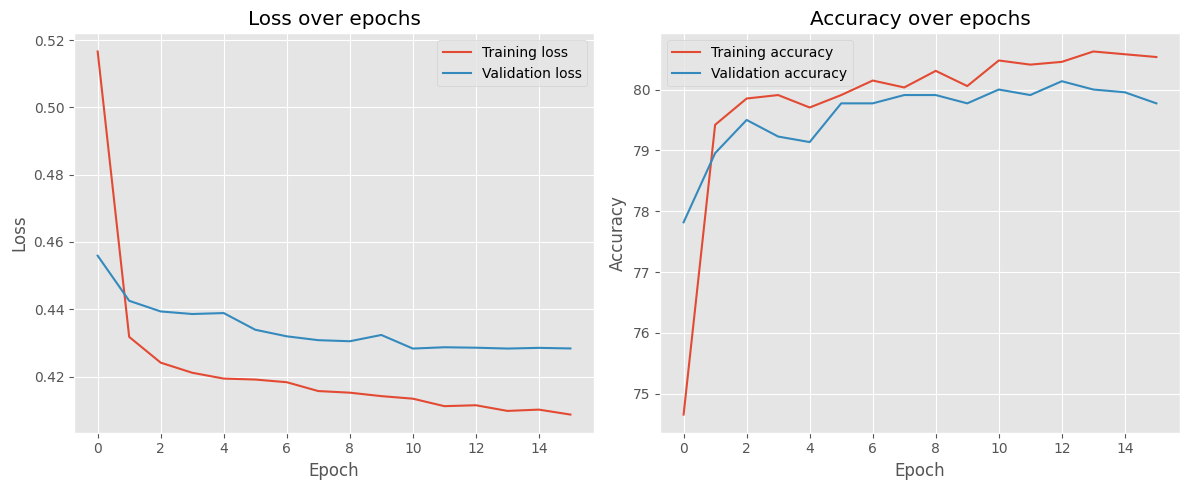

In [90]:

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(val_accuracies, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [91]:
y_pred_list = []

model.eval()
with torch.inference_mode():
    for X_batch in test_loader:
        # Jika test_loader hanya mengandung X saja, maka X_batch akan berbentuk tuple (X,)
        if isinstance(X_batch, (list, tuple)):
            X_batch = X_batch[0]
        X_batch = X_batch.to(device)
        
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_test_pred = torch.round(y_test_pred)
        y_pred_list.append(y_test_pred.cpu().numpy())

# Flatten list of arrays
y_pred_list = [a.squeeze() for a in y_pred_list]
y_pred_list = np.concatenate(y_pred_list)


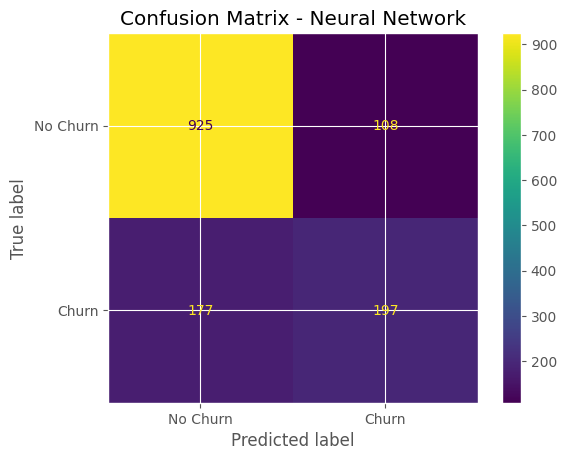

Accuracy Score : 0.7974413646055437


In [92]:
#Display confusion matrix
cm = confusion_matrix(y_test,y_pred_list)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["No Churn", "Churn"])
display.plot()
plt.title("Confusion Matrix - Neural Network")
plt.show()
print(f"Accuracy Score : {accuracy_score(y_test, y_pred_list)}") 

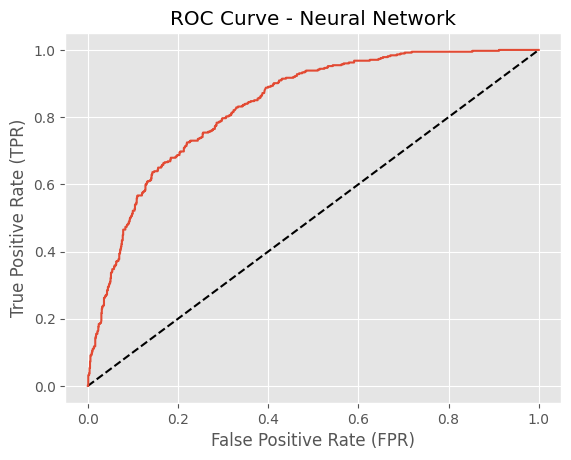

ROC AUC Score = 0.8344


In [93]:
y_pred_probs = []
with torch.inference_mode():
    for X_test in test_loader:
        # Ambil tensor dari tuple
        if isinstance(X_test, (list, tuple)):
            X_test = X_test[0]
        X_test = X_test.to(device)
        logits = model(X_test)
        y_pred_proba = torch.sigmoid(logits)
        y_pred_probs.append(y_pred_proba.cpu().numpy())

y_pred_prob = np.concatenate(y_pred_probs).reshape(-1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1], "k--")  # Diagonal untuk baseline
plt.plot(fpr, tpr)
plt.title("ROC Curve - Neural Network")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

print(f"ROC AUC Score = {roc_auc_score(y_test, y_pred_prob):.4f}")


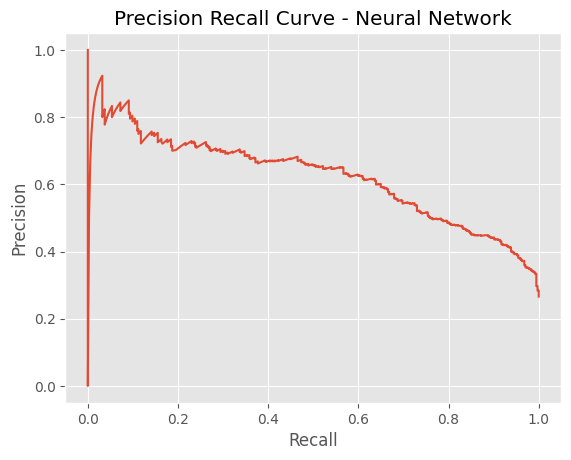

F1 Score : 0.5802650957290133
AUC (PRC) : 0.6206529366823291


In [94]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve - Neural Network")
plt.show()
print(f"F1 Score : {f1_score(y_test, y_pred_list)}")
print(f"AUC (PRC) : {auc(recall, precision)}")